<a href="https://colab.research.google.com/github/lucasfreire01/Microbiness_godaddy/blob/main/godaddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drawing datas of census DataFrame**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=f44edde34890d2469611dae24c3a4b39cce6e31b3000dd03dfd0a3baec5d3738
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [3]:
!pip install xgboost

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split,RepeatedKFold
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import matplotlib.pyplot as plt
import xgboost

In [5]:
#1St import dataset
census =  pd.read_csv('/content/drive/MyDrive/Godaddy/census_starter.csv')

In [6]:
census.head(93)

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,67.9,66.8,65.8,68.6,68.4,2198,10.7,11.5,12.6,11.8,...,0.6,0.7,0.5,0.4,0.5,52114,54191.0,52379,54018.0,55857.0
89,80.4,83.0,84.2,84.6,85.1,2220,19.6,20.4,20.2,22.0,...,1.1,1.3,1.5,1.9,1.9,70765,71534.0,73682,81708.0,82083.0
90,84.2,85.5,84.3,89.1,86.9,2230,24.5,27.4,24.8,19.2,...,1.1,0.4,0.4,0.3,0.3,70673,72237.0,73906,71875.0,75000.0
91,74.9,71.8,71.6,69.5,70.8,2240,10.0,10.0,9.5,10.8,...,2.8,2.4,2.1,2.0,0.8,63866,71541.0,70056,66941.0,68634.0


In [7]:
census.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [8]:
census.describe()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3141.000000,...,3142.000000,3141.000000,3142.000000,3141.000000,3141.000000,3142.000000,3141.000000,3142.000000,3140.000000,3140.000000
mean,69.920401,72.690866,75.398600,78.543298,80.539096,30383.649268,13.813399,14.005379,14.240452,14.631328,...,1.427148,1.382171,1.338956,1.309265,1.272684,49754.163908,51583.175422,53475.909612,55012.443312,58223.339490
std,9.702052,9.255863,8.846665,8.250864,7.889931,15162.508374,5.586649,5.630199,5.689780,5.776940,...,0.986985,0.942777,0.940891,0.990342,0.968579,13154.424871,13703.502202,14192.529173,14649.568591,15541.038914
min,24.500000,25.700000,34.800000,33.300000,37.000000,1001.000000,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,64.200000,67.425000,70.500000,74.100000,76.400000,18177.500000,9.700000,9.900000,10.100000,10.500000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41123.000000,42480.000000,44155.000000,45653.000000,48179.500000
50%,70.700000,73.600000,76.450000,79.600000,81.700000,29176.000000,12.800000,13.000000,13.250000,13.600000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48065.500000,49888.000000,51757.500000,52842.000000,55907.000000
75%,76.400000,78.800000,81.400000,84.100000,85.900000,45080.500000,16.800000,17.100000,17.300000,17.900000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55763.500000,57611.000000,59867.250000,61500.750000,64930.000000
max,94.600000,95.500000,96.000000,97.100000,97.600000,56045.000000,43.700000,48.000000,45.400000,43.000000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


In [9]:
census.isnull().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              1
pct_bb_2021              1
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         1
pct_college_2021         1
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    1
pct_foreign_born_2021    1
pct_it_workers_2017      0
pct_it_workers_2018      1
pct_it_workers_2019      0
pct_it_workers_2020      1
pct_it_workers_2021      1
median_hh_inc_2017       0
median_hh_inc_2018       1
median_hh_inc_2019       0
median_hh_inc_2020       2
median_hh_inc_2021       2
dtype: int64

In [10]:
for column in census.columns:
    census[column].fillna(census[column].mean(), inplace=True)

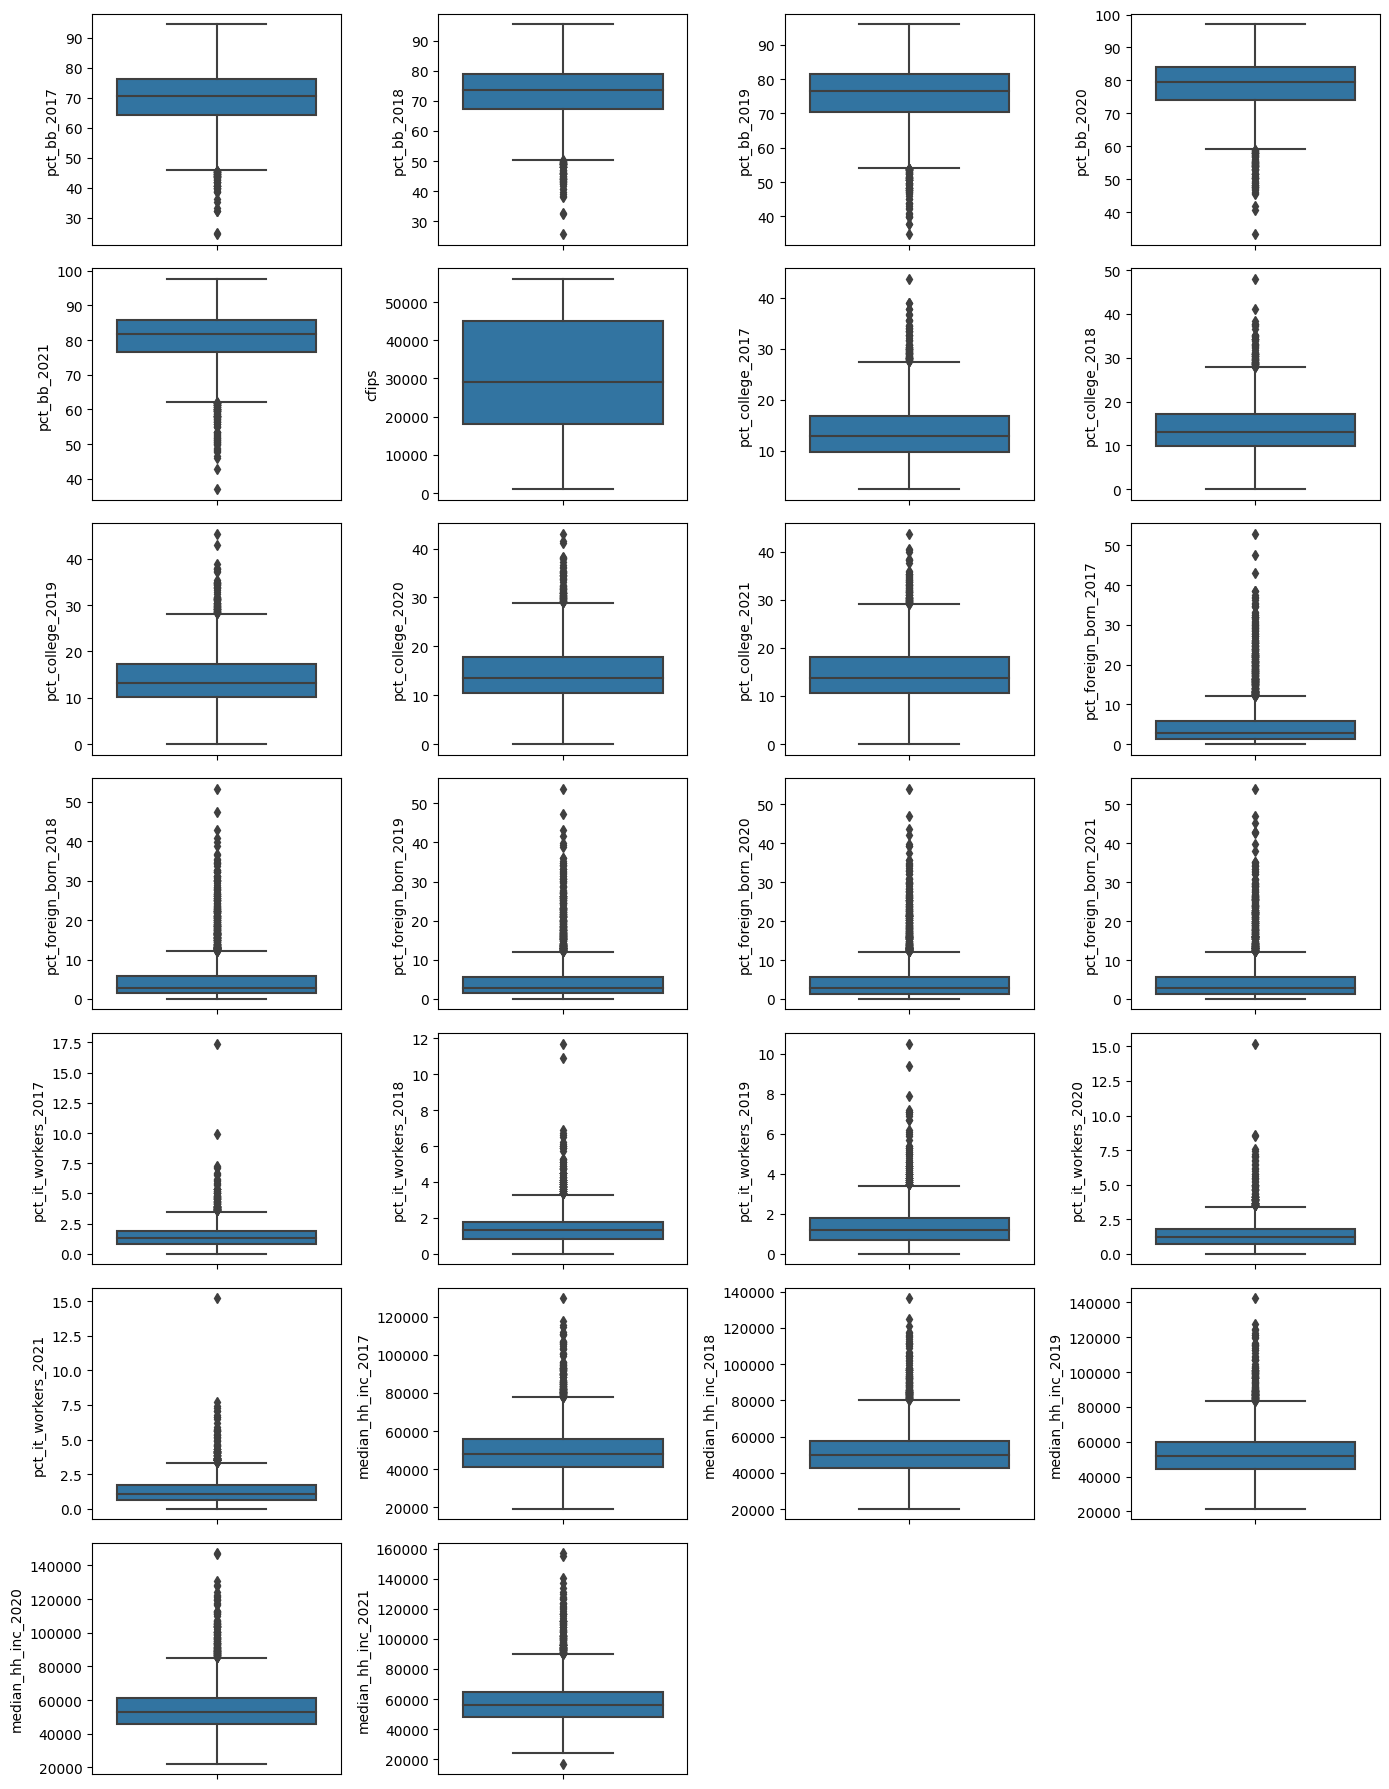

In [11]:
#set the size of boxplot
plt.rcParams["figure.figsize"] = [14.00, 18.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

#take the number of columns
num_columns = census.shape[1]
#Calculate to know the number of grid and subplots in the boxplot
num_rows = (num_columns + 3) //4
#set the paramets genereted before, the rows and grid
f, axes = plt.subplots(num_rows, 4)

#make a loop for each column providing the index and axes for these columns
for col_idx, ax in enumerate(axes.flatten()):
  #make sure the boxplot show is the all columns of dataset
  if col_idx < num_columns:
    #created the boxplot
    sns.boxplot(data=census, y= census.columns[col_idx], ax=ax)
    #rotate the lebels for a better vision
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  #if the current index exceends this block turn off the axis
  else:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
census.head(93)

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.700000,85.500000,1001,14.5,15.9,16.1,16.700000,...,1.3,1.1,0.7,0.600000,1.100000,55317,58786.0,58731,57982.000000,62660.00000
1,74.5,78.1,81.8,85.100000,87.900000,1003,20.4,20.7,21.0,20.200000,...,1.4,1.3,1.4,1.000000,1.300000,52562,55962.0,58320,61756.000000,64346.00000
2,57.2,60.4,60.5,64.600000,64.600000,1005,7.6,7.8,7.6,7.300000,...,0.5,0.3,0.8,1.100000,0.800000,33368,34186.0,32525,34990.000000,36422.00000
3,62.0,66.1,69.2,76.100000,74.600000,1007,8.1,7.6,6.5,7.400000,...,1.2,1.4,1.6,1.700000,2.100000,43404,45340.0,47542,51721.000000,54277.00000
4,65.8,68.5,73.0,79.600000,81.000000,1009,8.7,8.1,8.6,8.900000,...,1.3,1.4,0.9,1.100000,0.900000,47412,48695.0,49358,48922.000000,52830.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,67.9,66.8,65.8,68.600000,68.400000,2198,10.7,11.5,12.6,11.800000,...,0.6,0.7,0.5,0.400000,0.500000,52114,54191.0,52379,54018.000000,55857.00000
89,80.4,83.0,84.2,84.600000,85.100000,2220,19.6,20.4,20.2,22.000000,...,1.1,1.3,1.5,1.900000,1.900000,70765,71534.0,73682,81708.000000,82083.00000
90,84.2,85.5,84.3,89.100000,86.900000,2230,24.5,27.4,24.8,19.200000,...,1.1,0.4,0.4,0.300000,0.300000,70673,72237.0,73906,71875.000000,75000.00000
91,74.9,71.8,71.6,69.500000,70.800000,2240,10.0,10.0,9.5,10.800000,...,2.8,2.4,2.1,2.000000,0.800000,63866,71541.0,70056,66941.000000,68634.00000


In [13]:
for i in census.columns:
    census[i] = census[i].fillna(census[i].mean())

In [14]:
#Detecting outliers
from pyod.models.knn import KNN
detector = KNN()
detector.fit(census)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [15]:
#3138 is the number to rows of all census dataset
predict = detector.labels_
len(predict)

3142

In [16]:
#The KNN detected 2824 values don't outliers and 314 outliers values
np.unique(predict, return_counts=True)

(array([0, 1]), array([2827,  315]))

In [17]:
predict

array([0, 0, 0, ..., 1, 0, 1])

In [18]:
#See the distance calculus made from outliers identifier
trust = detector.decision_scores_
trust

array([5828.23176272, 5728.85126356, 4687.08895584, ..., 8647.6276689 ,
       3037.00377017, 9182.68738115])

In [19]:
#make a list with just outlirs
outliers = []
for i in range(len(predict)):
  if predict[i] == 1:
    outliers.append(i)

In [20]:
#see the outliers index
print(outliers)

[5, 31, 52, 58, 59, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 85, 87, 89, 90, 91, 92, 93, 94, 149, 151, 184, 186, 187, 192, 194, 206, 213, 215, 216, 220, 222, 223, 226, 228, 229, 251, 253, 254, 258, 261, 262, 264, 268, 269, 271, 273, 277, 284, 291, 293, 296, 302, 303, 304, 308, 310, 311, 314, 319, 382, 385, 390, 416, 418, 432, 442, 444, 468, 472, 494, 500, 504, 506, 514, 519, 520, 526, 529, 538, 539, 548, 557, 558, 567, 583, 591, 601, 616, 626, 641, 659, 661, 702, 725, 783, 814, 856, 901, 904, 934, 938, 973, 985, 987, 1004, 1066, 1093, 1100, 1111, 1116, 1124, 1130, 1142, 1150, 1153, 1196, 1198, 1202, 1204, 1205, 1207, 1209, 1210, 1226, 1228, 1384, 1395, 1426, 1428, 1432, 1442, 1460, 1479, 1595, 1608, 1610, 1614, 1632, 1637, 1639, 1657, 1678, 1691, 1710, 1711, 1712, 1718, 1721, 1725, 1739, 1742, 1751, 1752, 1753, 1754, 1757, 1770, 1771, 1775, 1776, 1781, 1783, 1785, 1786, 1787, 1791, 1792, 1796, 1801, 1805, 1806, 1810, 1816, 1857, 1867, 1871, 1879, 1887, 1904, 1983, 1993, 

In [21]:
len(outliers)

315

In [22]:
#Do a slice in the original dataset filtred all rows is outliers(list did up) in all columns
list_out = census.iloc[outliers].copy()

In [23]:
list_out

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
5,49.4,58.9,60.1,60.6,59.4,1011,6.6,7.4,7.4,6.1,...,0.4,0.3,0.5,0.3,0.2,29655,32152.0,37785,33866.0,29063.0
31,42.0,46.2,51.3,55.6,55.8,1063,8.3,6.4,6.1,5.8,...,0.6,1.1,0.8,0.7,0.6,20954,21804.0,24145,26688.0,28826.0
52,39.8,46.2,53.9,53.6,57.3,1105,8.7,8.2,12.9,11.5,...,1.3,1.2,0.0,0.0,2.8,22973,23561.0,23447,23875.0,27057.0
58,84.5,86.4,88.3,90.8,92.1,1117,27.9,27.9,28.4,28.9,...,3.3,2.8,2.5,2.3,1.7,74063,75761.0,77799,78889.0,82592.0
59,50.4,57.9,63.1,65.5,67.3,1119,10.6,11.6,11.4,9.9,...,1.5,0.7,0.9,0.7,1.4,21663,23132.0,24320,26150.0,27099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,82.9,81.7,85.6,88.1,89.8,56035,19.2,19.0,16.7,21.7,...,0.1,0.0,0.0,0.0,0.0,84911,78680.0,77403,78655.0,82342.0
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0


In [24]:
predict = detector.labels_

In [25]:
census.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [26]:
#Reducing the 25 columns for 6 columns
#We have 5 big groups on these groups have 5 columns so I formulated one column per group with the mean of all 5 columns in each group
columns = {'pct_bb_2017': census['pct_bb_2017'] ,
           'pct_bb_2018': census['pct_bb_2018'] ,
           'pct_bb_2019': census['pct_bb_2019'] ,
           'pct_bb_2020': census['pct_bb_2020'] ,
           'pct_bb_2021': census['pct_bb_2021'] }
name = ['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021']
mean_pct = []
count = []

for i in range(len(census)):
  if i == 0:
    i =1
  elif i == 1:
    i += 1
  elif i> 1:
    i += 1
  count.append(i)

df = pd.DataFrame(columns, count)

columns2 = {'pct_college_2017': census['pct_college_2017'] ,
           'pct_college_2018': census['pct_college_2018'] ,
           'pct_college_2019': census['pct_college_2019'] ,
           'pct_college_2020': census['pct_college_2020'] ,
           'pct_college_2021': census['pct_college_2021'] }
df2 = pd.DataFrame(columns2, count)

columns3 = {'pct_foreign_born_2017': census['pct_foreign_born_2017'] ,
           'pct_foreign_born_2018': census['pct_foreign_born_2018'] ,
           'pct_foreign_born_2019': census['pct_foreign_born_2019'] ,
           'pct_foreign_born_2020': census['pct_foreign_born_2020'] ,
           'pct_foreign_born_2021': census['pct_foreign_born_2021'] }
df3 = pd.DataFrame(columns3, count)

columns4 = {'pct_it_workers_2017': census['pct_it_workers_2017'] ,
           'pct_it_workers_2018': census['pct_it_workers_2018'] ,
           'pct_it_workers_2019': census['pct_it_workers_2019'] ,
           'pct_it_workers_2020': census['pct_it_workers_2020'] ,
           'pct_it_workers_2021': census['pct_it_workers_2021'] }
df4 = pd.DataFrame(columns4, count)


columns5 = {'median_hh_inc_2017': census['median_hh_inc_2017'] ,
           'median_hh_inc_2018': census['median_hh_inc_2018'] ,
           'median_hh_inc_2019': census['median_hh_inc_2019'] ,
           'median_hh_inc_2020': census['median_hh_inc_2020'] ,
           'median_hh_inc_2021': census['median_hh_inc_2021'] }
df5 = pd.DataFrame(columns5, count)

In [27]:
#Storing the mean columns in a list
df_media_bb = []
for i in df.index:
  df_media_bb.append(df.loc[i].mean())

In [28]:
df_media_college = []
for i in df2.index:
  df_media_college.append(df2.loc[i].mean())

In [29]:
df_media_foreign = []
for i in df3.index:
  df_media_foreign.append(df3.loc[i].mean())

In [30]:
df_media_it = []
for i in df4.index:
  df_media_it.append(df4.loc[i].mean())

In [31]:
df_media_hh = []
for i in df5.index:
  df_media_hh.append(df5.loc[i].mean())

In [32]:
#Puting these mean columns in the dataframe
census['pct_bb_mean'] = df_media_bb
census['pct_college_mean'] =  df_media_college
census['mean_hh_inc'] = df_media_hh
census['pct_foreign_born_mean'] = df_media_foreign
census['pct_mean_worked'] = df_media_it

In [33]:
census.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021', 'pct_bb_mean',
       'pct_college_mean', 'mean_hh_inc', 'pct_foreign_born_mean',
       'pct_mean_worked'],
      dtype='object')

In [34]:
#Deleting all columns just no the mean columns
census = census.drop(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020','pct_bb_2021'], axis=1)
census = census.drop(['pct_college_2017', 'pct_college_2018','pct_college_2019', 'pct_college_2020', 'pct_college_2021'], axis=1)
census = census.drop(['pct_foreign_born_2017', 'pct_foreign_born_2018','pct_foreign_born_2019', 'pct_foreign_born_2020','pct_foreign_born_2021'], axis=1)
census = census.drop(['pct_it_workers_2017', 'pct_it_workers_2018','pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021'], axis=1)
census = census.drop(['median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019','median_hh_inc_2020', 'median_hh_inc_2021'], axis=1)

In [35]:
census.columns

Index(['cfips', 'pct_bb_mean', 'pct_college_mean', 'mean_hh_inc',
       'pct_foreign_born_mean', 'pct_mean_worked'],
      dtype='object')

In [36]:
census

,cfips,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked
0,1001,81.48,20.58,58589.2,3.44,1.28
1,1003,61.46,7.40,34298.2,2.62,0.70
2,1005,69.60,7.50,48456.8,1.32,1.60
3,1007,73.58,8.72,49443.4,4.46,1.12
4,1009,57.68,7.12,32504.2,1.22,0.34
...,...,...,...,...,...,...
3137,56037,87.22,37.98,86021.8,11.26,1.36
3138,56039,88.70,11.68,64774.8,2.94,1.28
3139,56041,80.22,15.60,55704.6,1.70,1.04
3140,56043,76.44,13.52,57680.4,2.70,0.24


In [37]:
#In the compilation we get a problem on of rows show 0.0 so as is just one row we delete it.
census.drop(3141)

,cfips,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked
0,1001,81.48,20.58,58589.2,3.44,1.28
1,1003,61.46,7.40,34298.2,2.62,0.70
2,1005,69.60,7.50,48456.8,1.32,1.60
3,1007,73.58,8.72,49443.4,4.46,1.12
4,1009,57.68,7.12,32504.2,1.22,0.34
...,...,...,...,...,...,...
3136,56035,84.74,14.28,73797.2,5.14,0.82
3137,56037,87.22,37.98,86021.8,11.26,1.36
3138,56039,88.70,11.68,64774.8,2.94,1.28
3139,56041,80.22,15.60,55704.6,1.70,1.04


In [38]:
#The columns cfips will dalated because we have the same column wirth the same values in the train dataset
census.drop('cfips', axis=1, inplace=True)

# **Train Database**



In [81]:
#This dataset have additional datas for train dataset
rv = pd.read_csv('/content/drive/MyDrive/revealed_test.csv')
rv

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247
...,...,...,...,...,...,...,...
6265,56041_2022-12-01,56041,Uinta County,Wyoming,2022-12-01,4.050703,588
6266,56043_2022-11-01,56043,Washakie County,Wyoming,2022-11-01,3.143093,190
6267,56043_2022-12-01,56043,Washakie County,Wyoming,2022-12-01,3.060380,185
6268,56045_2022-11-01,56045,Weston County,Wyoming,2022-11-01,1.785395,100


In [83]:
#We have the cfips and first_day_of_month have these informations
rv.drop('row_id', axis=1, inplace=True)

In [84]:
#2St dataset loading
train = pd.read_csv('/content/drive/MyDrive/Godaddy/train.csv')
train

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [85]:
#Concating these two datasets train and rv
train = pd.concat([train, rv], ignore_index=True)

In [86]:
#Take the columns trated in the first column(census) and put on train dataset
train['pct_bb_mean'] = census['pct_bb_mean']
train['pct_college_mean'] = census['pct_college_mean']
train['mean_hh_inc'] = census['mean_hh_inc']
train['pct_foreign_born_mean'] = census['pct_foreign_born_mean']
train['pct_mean_worked'] = census['pct_mean_worked']

In [87]:
#We have the cfips and first_day_of_month have these informations
train.drop('row_id', inplace=True, axis=1)

In [88]:
# This test dataset have few columns so this dataset it's so little then the train dataset because that we decided concat these two columns
test = pd.read_csv('/content/drive/MyDrive/Godaddy/test.csv')
test

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
...,...,...,...
25075,56037_2023-06-01,56037,2023-06-01
25076,56039_2023-06-01,56039,2023-06-01
25077,56041_2023-06-01,56041,2023-06-01
25078,56043_2023-06-01,56043,2023-06-01


In [48]:
test.drop('row_id', inplace=True, axis=1)

In [49]:
#Concating the test dataset with train dataset
train = pd.concat([train, test], ignore_index=True)

In [50]:
#Spliting da column first_day_of_month in year, month and day
import datetime as dt
train['first_day_of_month'] = pd.to_datetime(train['first_day_of_month'])
train['year'] = train['first_day_of_month'].dt.year
train['month'] = train['first_day_of_month'].dt.month
train['day'] = train['first_day_of_month'].dt.day

In [51]:
#Using the Label Encoder for transforming the categorical columns in numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['county'] = lb.fit_transform(train['county'])
train['state'] = lb.fit_transform(train['state'])

In [52]:
train

,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked,year,month,day
0,1001,82,0,2019-08-01,3.007682,1249.0,81.48,20.58,58589.2,3.44,1.28,2019,8,1
1,1001,82,0,2019-09-01,2.884870,1198.0,61.46,7.40,34298.2,2.62,0.70,2019,9,1
2,1001,82,0,2019-10-01,3.055843,1269.0,69.60,7.50,48456.8,1.32,1.60,2019,10,1
3,1001,82,0,2019-11-01,2.993233,1243.0,73.58,8.72,49443.4,4.46,1.12,2019,11,1
4,1001,82,0,2019-12-01,2.993233,1243.0,57.68,7.12,32504.2,1.22,0.34,2019,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153610,56037,1871,51,2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,6,1
153611,56039,1871,51,2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,6,1
153612,56041,1871,51,2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,6,1
153613,56043,1871,51,2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,6,1


In [53]:
#Changing the NaN values by mean of column
train['microbusiness_density'].fillna(train['microbusiness_density'].mean(), inplace=True)
train['active'].fillna(train['active'].mean(), inplace=True)
train['pct_bb_mean'].fillna(train['pct_bb_mean'].mean(), inplace=True)
train['pct_college_mean'].fillna(train['pct_college_mean'].mean(), inplace=True)
train['mean_hh_inc'].fillna(train['mean_hh_inc'].mean(), inplace=True)
train['pct_foreign_born_mean'].fillna(train['pct_foreign_born_mean'].mean(), inplace=True)
train['pct_mean_worked'].fillna(train['pct_mean_worked'].mean(), inplace=True)

In [54]:
train

,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked,year,month,day
0,1001,82,0,2019-08-01,3.007682,1249.000000,81.48000,20.580000,58589.200000,3.440000,1.280000,2019,8,1
1,1001,82,0,2019-09-01,2.884870,1198.000000,61.46000,7.400000,34298.200000,2.620000,0.700000,2019,9,1
2,1001,82,0,2019-10-01,3.055843,1269.000000,69.60000,7.500000,48456.800000,1.320000,1.600000,2019,10,1
3,1001,82,0,2019-11-01,2.993233,1243.000000,73.58000,8.720000,49443.400000,4.460000,1.120000,2019,11,1
4,1001,82,0,2019-12-01,2.993233,1243.000000,57.68000,7.120000,32504.200000,1.220000,0.340000,2019,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153610,56037,1871,51,2023-06-01,3.827817,6461.169277,75.41672,14.307844,53608.187312,4.738471,1.346168,2023,6,1
153611,56039,1871,51,2023-06-01,3.827817,6461.169277,75.41672,14.307844,53608.187312,4.738471,1.346168,2023,6,1
153612,56041,1871,51,2023-06-01,3.827817,6461.169277,75.41672,14.307844,53608.187312,4.738471,1.346168,2023,6,1
153613,56043,1871,51,2023-06-01,3.827817,6461.169277,75.41672,14.307844,53608.187312,4.738471,1.346168,2023,6,1


In [55]:
train.columns

Index(['cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'pct_bb_mean', 'pct_college_mean',
       'mean_hh_inc', 'pct_foreign_born_mean', 'pct_mean_worked', 'year',
       'month', 'day'],
      dtype='object')

In [57]:
#Droping the first_day_of_month because we aready have that column splited
train = train.drop('first_day_of_month', axis=1)

In [59]:
#Standardizing the values for have a better score
from sklearn.preprocessing import StandardScaler
obg_df = StandardScaler().fit(train)

In [60]:
train_df = obg_df.transform(train)
train_df

array([[-1.93978544, -1.70210471, -1.90020988, ..., -1.74569518,
         0.36706517,  0.        ],
       [-1.93978544, -1.70210471, -1.90020988, ..., -1.74569518,
         0.64809945,  0.        ],
       [-1.93978544, -1.70210471, -1.90020988, ..., -1.74569518,
         0.92913372,  0.        ],
       ...,
       [ 1.69479001,  1.32276573,  1.30093102, ...,  1.60877791,
        -0.19500337,  0.        ],
       [ 1.69492208,  1.32276573,  1.30093102, ...,  1.60877791,
        -0.19500337,  0.        ],
       [ 1.69505415,  1.32276573,  1.30093102, ...,  1.60877791,
        -0.19500337,  0.        ]])

In [61]:
train.columns

Index(['cfips', 'county', 'state', 'microbusiness_density', 'active',
       'pct_bb_mean', 'pct_college_mean', 'mean_hh_inc',
       'pct_foreign_born_mean', 'pct_mean_worked', 'year', 'month', 'day'],
      dtype='object')

In [62]:
#Remaking the dataframe
train_df = pd.DataFrame(train_df)
train_df.columns = ['cfips', 'county', 'state', 'microbusiness_density', 'active',
       'pct_bb_mean', 'pct_college_mean', 'mean_hh_inc',
       'pct_foreign_born_mean', 'pct_mean_worked', 'year', 'month', 'day']

In [63]:
train_df

,cfips,county,state,microbusiness_density,active,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked,year,month,day
0,-1.939785,-1.702105,-1.900210,-1.772157e-01,-0.172055,4.944332e+00,7.796478e+00,2.473064e+00,-1.599486e+00,-5.324474e-01,-1.745695,0.367065,0.0
1,-1.939785,-1.702105,-1.900210,-2.037530e-01,-0.173739,-1.138108e+01,-8.586656e+00,-9.587374e+00,-2.609581e+00,-5.199670e+00,-1.745695,0.648099,0.0
2,-1.939785,-1.702105,-1.900210,-1.668090e-01,-0.171395,-4.743273e+00,-8.462353e+00,-2.557655e+00,-4.210950e+00,2.042572e+00,-1.745695,0.929134,0.0
3,-1.939785,-1.702105,-1.900210,-1.803378e-01,-0.172253,-1.497762e+00,-6.945856e+00,-2.067809e+00,-3.430273e-01,-1.819957e+00,-1.745695,1.210168,0.0
4,-1.939785,-1.702105,-1.900210,-1.803378e-01,-0.172253,-1.446350e+01,-8.934704e+00,-1.047809e+01,-4.334133e+00,-8.096566e+00,-1.745695,1.491202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153610,1.694526,1.322766,1.300931,-9.595930e-17,0.000000,-3.476494e-14,-4.416129e-15,-1.806250e-14,2.188157e-15,5.360336e-15,1.608778,-0.195003,0.0
153611,1.694658,1.322766,1.300931,-9.595930e-17,0.000000,-3.476494e-14,-4.416129e-15,-1.806250e-14,2.188157e-15,5.360336e-15,1.608778,-0.195003,0.0
153612,1.694790,1.322766,1.300931,-9.595930e-17,0.000000,-3.476494e-14,-4.416129e-15,-1.806250e-14,2.188157e-15,5.360336e-15,1.608778,-0.195003,0.0
153613,1.694922,1.322766,1.300931,-9.595930e-17,0.000000,-3.476494e-14,-4.416129e-15,-1.806250e-14,2.188157e-15,5.360336e-15,1.608778,-0.195003,0.0


In [64]:
#Normalization the values for compete with Standard values
from sklearn.preprocessing import MinMaxScaler
obj_norm = MinMaxScaler().fit(train)
train_norm = obj_norm.transform(train)
train_norm

array([[0.        , 0.04382683, 0.        , ..., 0.        , 0.63636364,
        0.        ],
       [0.        , 0.04382683, 0.        , ..., 0.        , 0.72727273,
        0.        ],
       [0.        , 0.04382683, 0.        , ..., 0.        , 0.81818182,
        0.        ],
       ...,
       [0.99992733, 1.        , 1.        , ..., 1.        , 0.45454545,
        0.        ],
       [0.99996367, 1.        , 1.        , ..., 1.        , 0.45454545,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.45454545,
        0.        ]])

In [65]:
train_norm = pd.DataFrame(train_norm)
train_norm.columns = ['cfips', 'county', 'state', 'microbusiness_density', 'active',
       'pct_bb_mean', 'pct_college_mean', 'mean_hh_inc',
       'pct_foreign_born_mean', 'pct_mean_worked', 'year', 'month', 'day']

In [66]:
train_norm

,cfips,county,state,microbusiness_density,active,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked,year,month,day
0,0.000000,0.043827,0.0,0.010578,0.001070,0.747383,0.456108,0.301581,0.064203,0.105611,0.0,0.636364,0.0
1,0.000000,0.043827,0.0,0.010146,0.001026,0.398116,0.150023,0.099199,0.048899,0.057756,0.0,0.727273,0.0
2,0.000000,0.043827,0.0,0.010747,0.001087,0.540126,0.152346,0.217162,0.024636,0.132013,0.0,0.818182,0.0
3,0.000000,0.043827,0.0,0.010527,0.001064,0.609560,0.180678,0.225382,0.083240,0.092409,0.0,0.909091,0.0
4,0.000000,0.043827,0.0,0.010527,0.001064,0.332170,0.143521,0.084252,0.022770,0.028053,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153610,0.999855,1.000000,1.0,0.013462,0.005533,0.641604,0.310447,0.260081,0.088437,0.111070,1.0,0.454545,0.0
153611,0.999891,1.000000,1.0,0.013462,0.005533,0.641604,0.310447,0.260081,0.088437,0.111070,1.0,0.454545,0.0
153612,0.999927,1.000000,1.0,0.013462,0.005533,0.641604,0.310447,0.260081,0.088437,0.111070,1.0,0.454545,0.0
153613,0.999964,1.000000,1.0,0.013462,0.005533,0.641604,0.310447,0.260081,0.088437,0.111070,1.0,0.454545,0.0


In [67]:
#Spiting the dataset in train and test, the train part we have 2 variables one with standard values and other with normalization values
var_predict = train_df.drop('microbusiness_density', axis=1)
var_target = train['microbusiness_density']
var_predict_norm = train_norm.drop('microbusiness_density', axis=1)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(var_predict, var_target, test_size=0.3, random_state=1)

In [69]:
#See the performance of XGBRegressor with standard values
xgb = xgboost.XGBRegressor()
xgb = xgb.fit(x_train, y_train)

In [70]:
#Score: 96.10
ac = xgb.score(x_test, y_test)
print('Accurancy :' + str(ac))

Accurancy :0.9609497203489188


In [71]:
#See the performance of XGBRegressor with standard values
#Score: 96.10
x_train, x_test, y_train, y_test = train_test_split(var_predict_norm, var_target, test_size=0.3, random_state=1)
xgb = xgboost.XGBRegressor()
xgb = xgb.fit(x_train, y_train)
ac = xgb.score(x_test, y_test)
print('Accurancy :' + str(ac))

Accurancy :0.9609444382513227


In [72]:
#See the performance wih RandomFlorestRegressor with standard values
#Score: 99.37
x_train, x_test, y_train, y_test = train_test_split(var_predict, var_target, test_size=0.3, random_state=1)
rf = RandomForestRegressor()
rf = rf.fit(x_train, y_train)
ac = rf.score(x_test, y_test)
print('Accurancy :' + str(ac))

Accurancy :0.9934560591033983


In [73]:
#extracting the predictions
predict = rf.predict(x_test)

In [74]:
predict

array([3.4734478 , 0.84177937, 3.8278169 , ..., 5.38961352, 0.99075383,
       4.36639968])

In [75]:
len(predict)

46085

In [76]:
#Go back with original values
var_train = train.drop('microbusiness_density', axis=1)
x_train, x_test, y_train, y_test = train_test_split(var_train, var_target, test_size=0.3, random_state=1)

In [77]:
x_test

,cfips,county,state,active,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked,year,month,day
114294,51700,1188,46,4845.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2021,8,1
83034,40003,21,36,39.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2019,11,1
149703,45091,1871,51,6461.169277,75.41672,14.307844,53608.187312,4.738471,1.346168,2023,5,1
110728,51047,432,46,3403.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2020,3,1
73900,37015,146,33,230.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2022,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
83118,40007,122,36,84.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2020,5,1
128265,54031,727,48,253.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2022,11,1
106524,48425,1554,43,367.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2020,11,1
116688,54015,350,48,69.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2019,8,1


In [78]:
#Puting the values of predict
x_test['microbusiness_density'] = predict

In [79]:
#The column "predict" is reverent the microbusiness_density that is the column target
x_test

,cfips,county,state,active,pct_bb_mean,pct_college_mean,mean_hh_inc,pct_foreign_born_mean,pct_mean_worked,year,month,day,microbusiness_density
114294,51700,1188,46,4845.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2021,8,1,3.473448
83034,40003,21,36,39.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2019,11,1,0.841779
149703,45091,1871,51,6461.169277,75.41672,14.307844,53608.187312,4.738471,1.346168,2023,5,1,3.827817
110728,51047,432,46,3403.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2020,3,1,9.183711
73900,37015,146,33,230.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2022,6,1,1.442390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83118,40007,122,36,84.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2020,5,1,2.046627
128265,54031,727,48,253.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2022,11,1,2.311149
106524,48425,1554,43,367.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2020,11,1,5.389614
116688,54015,350,48,69.000000,75.41672,14.307844,53608.187312,4.738471,1.346168,2019,8,1,0.990754


In [80]:
#The MAE is 0.04
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predict)

print("MAE:", mae)

MAE: 0.047997202265090515


Thank you for see my code